In [1]:
import pickle

with open("mitmovie.pickle", "rb") as handle:
    dataset = pickle.load(handle)

In [2]:
dataset.keys()

dict_keys(['train_tokens', 'train_labels', 'test_tokens', 'test_labels'])

In [3]:
train_sentences = []
test_sentences = []
for i in range(len(dataset['train_tokens'])):
    train_sentences.append(' '.join(dataset['train_tokens'][i]))
for i in range(len(dataset['test_tokens'])):
    test_sentences.append(' '.join(dataset['test_tokens'][i]))

In [4]:
print(train_sentences[1])
print(dataset['train_labels'][1])

show me films with drew barrymore from the 1980s
['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'O', 'B-YEAR']


In [5]:
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
)
import numpy as np

c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
bert_model = BertModel.from_pretrained("bert-base-cased")

In [7]:
def get_bert_dataset(sentences, label_list):
    # Function to get BERT embeddings
    all_embeddings = []
    all_labels = []
    for sentence, labels in zip(sentences, label_list):
        inputs = tokenizer(
            sentence,
            return_tensors="pt",
            padding=True,
            truncation=True,
            is_split_into_words=True,
        )
        outputs = bert_model(**inputs)
        last_hidden_state = outputs.last_hidden_state.squeeze(0)

        for idx, label in enumerate(labels):
            word_embedding = last_hidden_state[idx].detach().numpy()
            all_embeddings.append(word_embedding)
            all_labels.append(label)
    return np.array(all_embeddings), np.array(all_labels)

In [8]:
X, y = get_bert_dataset(train_sentences, dataset['train_labels'])

In [14]:
np.savetxt("train_embeddings.csv", X.reshape(X.shape[0], -1), delimiter=",")
np.savetxt("train_labels.csv", y, delimiter=",", fmt="%s")

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(X_train[0])
print(y_train[0])

[ 2.57073939e-01 -7.63503015e-02 -2.82189667e-01  2.40392789e-01
  6.10149801e-01  2.19047755e-01  2.61544794e-01 -7.33295605e-02
 -1.20966718e-01 -1.45067394e-01 -1.24831215e-01  6.70563102e-01
 -5.17767787e-01  4.01521802e-01 -2.15666518e-02  4.64103743e-02
  4.46507424e-01 -3.78512502e-01  1.49562478e-01  4.22644377e-01
 -9.60238874e-02 -3.23148012e-01  1.02874495e-01  2.34013602e-01
  1.45894170e-01 -3.71261984e-01 -3.38579237e-01  8.25517178e-01
  3.01365197e-01  4.53741133e-01 -2.45949417e-01 -7.94717818e-02
  2.24810988e-01 -4.29269020e-03 -5.48051000e-01 -1.82123303e-01
  6.80440426e-01 -1.35859847e-02 -2.44221874e-02  1.67577416e-01
 -7.04629421e-01 -1.41357422e-01 -2.63003886e-01  5.14317453e-01
  1.73197016e-01 -3.14322293e-01  4.80213523e-01  8.09919387e-02
 -6.98133945e-01  3.73997748e-01  1.61849573e-01 -8.13440681e-02
 -7.45214000e-02  5.03182374e-02  2.97530115e-01 -5.55736363e-01
 -7.29608983e-02 -4.97230351e-01 -2.14136243e-01 -2.68906653e-01
  1.09730974e-01 -2.65523

['O' 'B-ACTOR' 'I-YEAR' ... 'O' 'O' 'I-TITLE']
['O' 'O' 'O' ... 'O' 'O' 'O']
                   precision    recall  f1-score   support

          B-ACTOR       0.40      0.03      0.06       675
      B-CHARACTER       0.00      0.00      0.00        79
       B-DIRECTOR       0.00      0.00      0.00       335
          B-GENRE       0.00      0.00      0.00       884
           B-PLOT       0.00      0.00      0.00       385
         B-RATING       0.00      0.00      0.00       469
B-RATINGS_AVERAGE       0.00      0.00      0.00       366
         B-REVIEW       0.00      0.00      0.00        38
           B-SONG       0.00      0.00      0.00        47
          B-TITLE       0.00      0.00      0.00       483
        B-TRAILER       0.00      0.00      0.00        25
           B-YEAR       0.00      0.00      0.00       536
          I-ACTOR       0.00      0.00      0.00       712
      I-CHARACTER       0.00      0.00      0.00        64
       I-DIRECTOR       0.00      0.0

c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


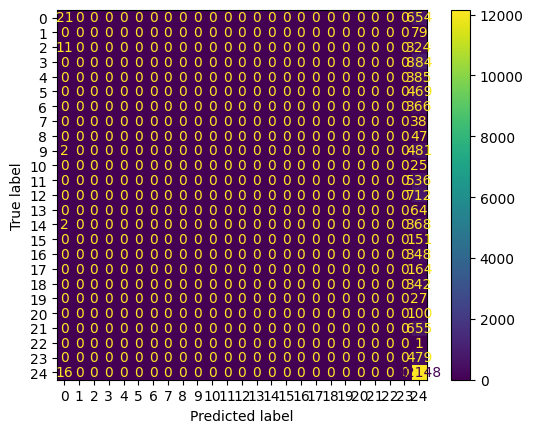

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Train SVM model
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

# accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

['O' 'B-ACTOR' 'I-YEAR' ... 'O' 'O' 'I-TITLE']
['O' 'B-DIRECTOR' 'O' ... 'O' 'O' 'I-TITLE']


c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Haitheone\.conda\envs\radar\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

          B-ACTOR       0.60      0.64      0.62       675
      B-CHARACTER       0.55      0.46      0.50        79
       B-DIRECTOR       0.67      0.54      0.60       335
          B-GENRE       0.52      0.61      0.56       884
           B-PLOT       0.46      0.36      0.40       385
         B-RATING       0.61      0.44      0.51       469
B-RATINGS_AVERAGE       0.41      0.23      0.29       366
         B-REVIEW       0.04      0.03      0.03        38
           B-SONG       0.67      0.47      0.55        47
          B-TITLE       0.74      0.64      0.68       483
        B-TRAILER       0.62      0.40      0.49        25
           B-YEAR       0.52      0.43      0.47       536
          I-ACTOR       0.55      0.64      0.59       712
      I-CHARACTER       0.50      0.31      0.38        64
       I-DIRECTOR       0.59      0.52      0.55       370
          I-GENRE       0.69      0.55      0.61       

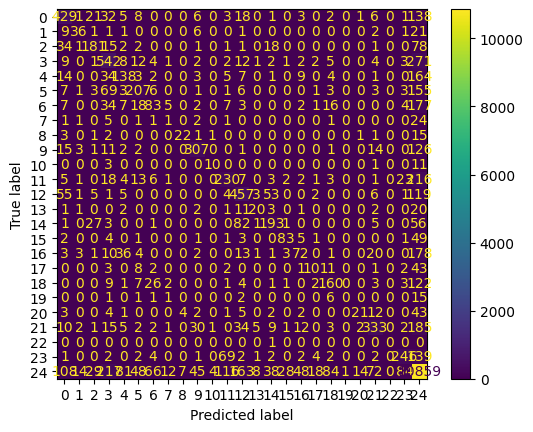

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

# accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)